# STUDIO DELL'ANDAMENTO DELL'ONDA

L'onda instaurata decresce all'aumentare della distanza tra emettitore e ricevitore. Presenta inoltre un'andamento oscillatorio dovuto alla presenza dell'onda stazionaria. Per campionare i valori sono state misurate le tensioni ai picchi di massimo e minimo variando la posizione del ricevitore

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from giopy import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'ampiezza_distanza.csv'
fr = pd.read_csv(FILE)

Le incertezze sono: 

- $\sigma_d$ = 2mm
- $\sigma_V$ = misurate in lab

NOTA: per trovare la distanza tra emettitore e ricevitore è stata compiuta la differenza tra la loro posizione sul righello, inoltre è stata applicata una correzione di 6 + 2 cm dovuta al posizionamento del punto di emissione e ricezione rispetto al piedino dove è stata raccolta la misura

$(\sigma_d = \sqrt{1mm^2 + 1mm^2 + 1mm^2 + 1mm^2} = 2mm)$

In [2]:
# correzione per la distanza (il punto a cui è stata presa la distanza non è il punto di emissione)
correzione = 0.06 + 0.02

dMAX = np.abs(np.array(fr['Ricevitore MAX (piede) (cm)']) - np.array(fr['Emettitore (piede) (cm)'])) * 0.01 - correzione
sigmaD1 = 0.002 * np.ones_like(dMAX) # 2mm per entrambi i bracci e 2mm per le correzioni

Vmax = np.array(fr['Vmax (Volt)'])
sigmaVmax = np.array(fr['sigmaVmax'])

# GRUPPO DI CONTROLLO

sono state raccolte ulteriori misure dei valori di picco spazzando distanze maggiori

In [3]:
FILE = dir_path + '/data/' + 'ampiezza_distanza.csv'
fr = pd.read_csv(FILE)
# maxControllo = np.array(fr['MAX (cm) controllo'])[0:7]
VmaxControllo = np.array(fr['Vmax (volt) controllo'])[0:7]
sigmaVmaxControllo = np.array(fr['sigmaVmax controllo'])[0:7]

dcontrollo = np.abs(np.array(fr['MAX (cm) controllo'])[0:7] - np.array(fr['Emettitore controllo'])[0:7]) * 0.01 - correzione
sigmaD2 = 0.002 * np.ones_like(dcontrollo) # 2mm per entrambi i bracci

### COLLEZIONE DATI

qui concateno tutti i dati raccolti

In [4]:
V = np.concatenate((Vmax, VmaxControllo))
sigmaV = np.concatenate((sigmaVmax, sigmaVmaxControllo))
d = np.concatenate((dMAX, dcontrollo))
sigmaD = np.concatenate((sigmaD1, sigmaD2))

Fitto andamento 1/r: $V(r) = \frac{a}{r} + b$

In [5]:
unosur = lambda r,a,b: a/r + b # andamento 1/r

fit = Interpolazione(d, V, sigmaV, sigmaD, unosur, [1,1], ['a','b'],iteration=2)
print(fit)

----------------- VALORI FIT: -----------------
a: 1.225 ± 0.006 
b: (2.653 ± 0.147)e-1 

dof: 23
chi2: 506.31
chi2 ridotto: 22.01
pvalue: 0.0
------------------------------------------------



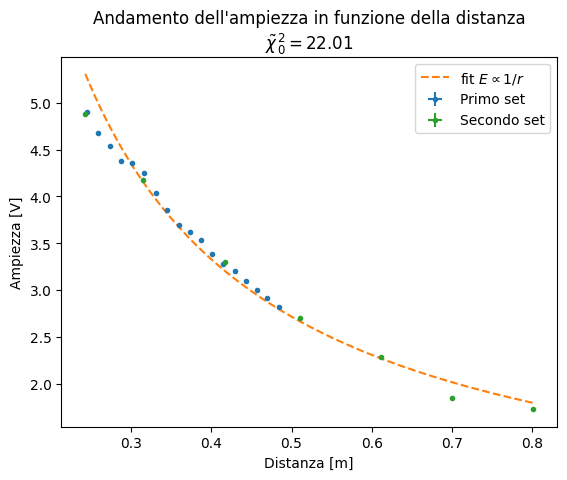

In [6]:
plt.errorbar(dMAX, Vmax, yerr=sigmaVmax, xerr=sigmaD[0], fmt= '.', label='Primo set')

plt.plot(*fit.draw(),'--', label='fit $E \propto 1/r$')

plt.errorbar(dcontrollo, VmaxControllo, yerr=sigmaVmaxControllo, xerr=sigmaD2, fmt='.', label='Secondo set') # gruppo controllo)

plt.title('Andamento dell\'ampiezza in funzione della distanza\n' + f'$\\tilde\chi_0^2 = {fit.rchi2}$')
plt.xlabel('Distanza [m]')
plt.ylabel('Ampiezza [V]')
plt.legend()
plt.show()

Qualitativamente l'andamento è proporzionale a 1/r, quantitativamente sono state sottostimate le incertezze